In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'smoking:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4012063%2F6981583%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240905%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240905T105802Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D47661f8fb5530fcc863bbed42aeb0ee74b8570a031c294cb2833bf2eea14dd3c332e198895628f2149263896a65c41d8ce33c139943fadf78c898858aa75bfb3e8bbbc85bab4d8badc0f60a10a6f5683ad1f9566fdd1c6c12562ae83fc20035d1c8d2d605cc79651887ee638baf538f11c7afe9231ae2ddb688c9e2b58bf32feca3883e938cf968f81c43bcdaf574c90b50cf7bbec89e9afc8e4050d7d13d045f930e9194555313a661d922ba2531c17c0119c47a1d3f41bf9db93244a477269f4e60afaf1c3053d5354b6bde7bbc9550a9c603576b8a38e74ea9f43a352ca0f592b2909a209261e19af6037eb2f434638cbc4f371d0842b8656e0fb3f5912d8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


The system cannot find the path specified.


OSError: [WinError 1314] A required privilege is not held by the client: '/kaggle/input' -> '..\\input'

In [ ]:
pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 630.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import  layers , models ,optimizers
from tensorflow import  keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.utils import shuffle
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import imgaug.augmenters as iaa


# **extract the images and it's label for training and test images**

In [ ]:
dataset_path = '/kaggle/input/smoking/Training/Training'
img_size = 250

train_data = []
train_labels = []
train_paths = []
# Iterate through the dataset directory
for img_name in os.listdir(dataset_path):

    if(img_name[:3] == 'not'):
      img_class = 'notsmoking'
    else :
      img_class = 'smoking'
    train_labels.append(img_class)
    img_path = os.path.join(dataset_path, img_name)
    train_paths.append(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_data.append([img,img_class])

In [ ]:
train_data[0][1]

'notsmoking'

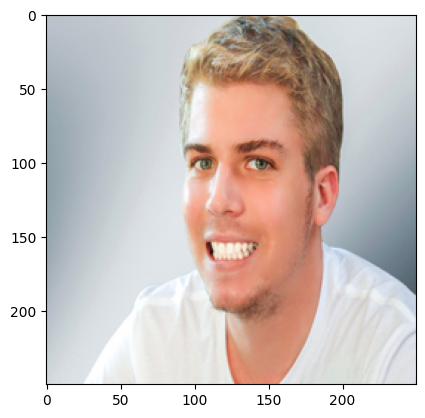

In [ ]:
plt.imshow(train_data[0][0])

In [ ]:
train_paths[:3]

['/kaggle/input/smoking/Training/Training/notsmoking_0161.jpg',
 '/kaggle/input/smoking/Training/Training/smoking_0058.jpg',
 '/kaggle/input/smoking/Training/Training/notsmoking_0541.jpg']

In [ ]:
train_labels[:3]

['notsmoking', 'smoking', 'notsmoking']

In [ ]:
dataset_path = '/kaggle/input/smoking/Testing/Testing'

test_data = []
test_labels = []
test_paths = []
# Iterate through the dataset directory
for img_name in os.listdir(dataset_path):
    if(img_name[:3] == 'not'):
      img_class = 'notsmoking'
    else :
      img_class = 'smoking'
    test_labels.append(img_class)
    img_path = os.path.join(dataset_path, img_name)
    test_paths.append(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_data.append([img,img_class])


In [ ]:
test_data[0][1]

'notsmoking'

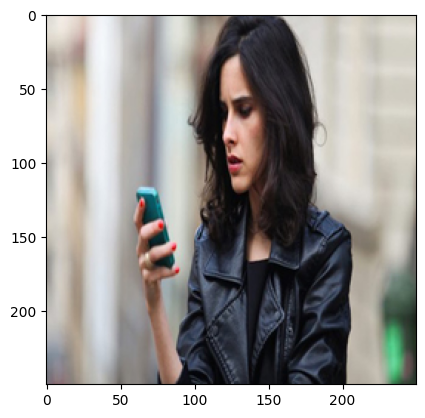

In [ ]:
plt.imshow(test_data[0][0])

In [ ]:
test_paths[:3]

['/kaggle/input/smoking/Testing/Testing/notsmoking_0281.jpg',
 '/kaggle/input/smoking/Testing/Testing/smoking_0490.jpg',
 '/kaggle/input/smoking/Testing/Testing/smoking_0474.jpg']

In [ ]:
test_labels[:3]

['notsmoking', 'smoking', 'smoking']

# display some random images

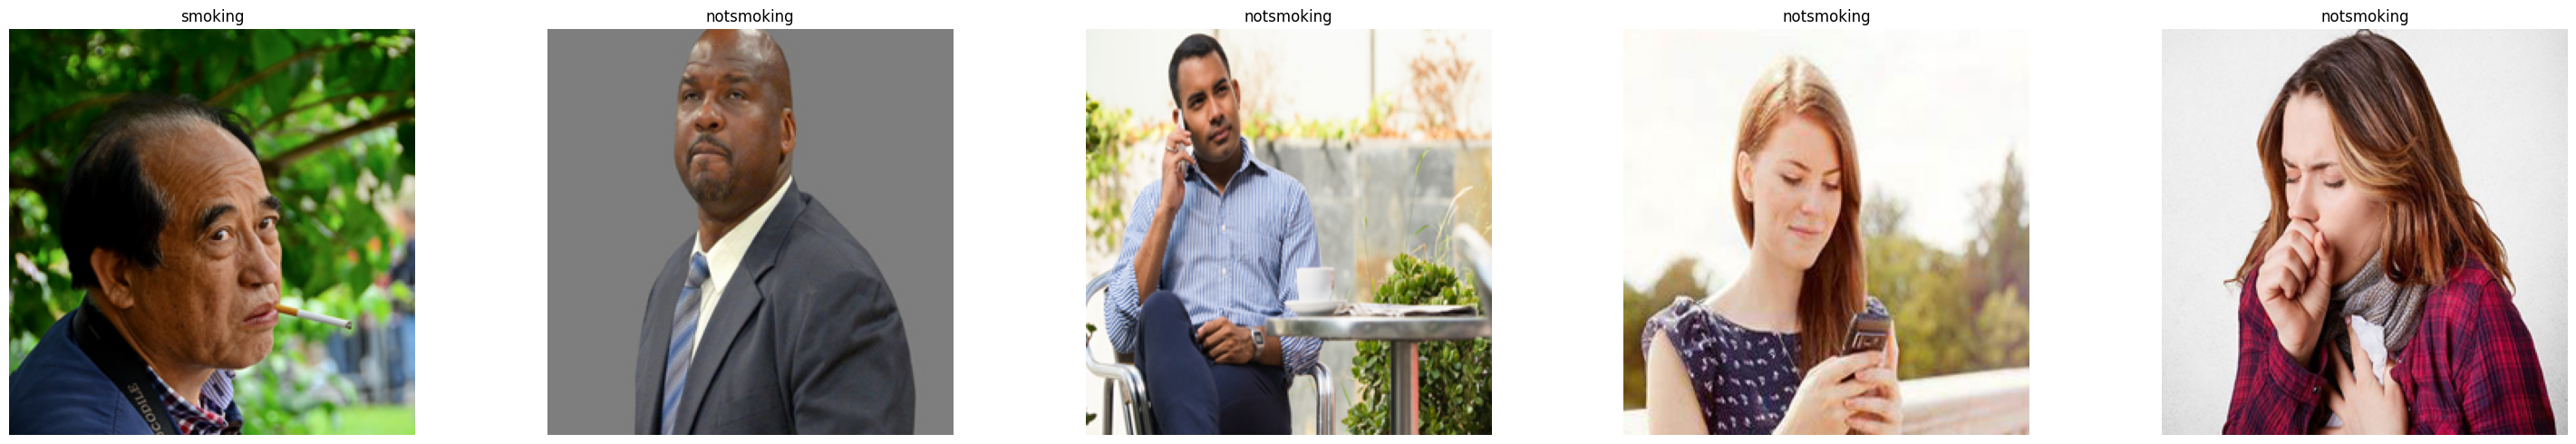

In [ ]:
def display_random_images(images, labels, num_images=5):
    num_total_images = len(images)
    random_indices = np.random.choice(num_total_images, size=num_images, replace=False)

    fig, axes = plt.subplots(1, num_images, figsize=(30, 5))
    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx][0])

        axes[i].set_title(labels[idx])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

display_random_images(train_data, train_labels)

# shuffle data

In [ ]:
random.shuffle(train_data)
random.shuffle(test_data)


In [ ]:
for item in train_data[:3]:
  print(item[1])

notsmoking
smoking
smoking


# split train and test

In [ ]:
x_train , x_test , y_train , y_test = [] , [] , [] , []

def extract_splits(data):
    for features ,label  in data  :

        if(data == train_data):
            x_train.append(features)
            y_train.append(label)
        else:
            x_test.append(features)
            y_test.append(label)

In [ ]:
extract_splits(train_data)

In [ ]:
extract_splits(test_data)

# turn data into numpy array

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print("x_train shape ",x_train.shape)
print("y_train shape ",y_train.shape)

print("x_train shape ",x_test.shape)
print("y_train shape ",y_test.shape)

x_train shape  (716, 250, 250, 3)
y_train shape  (716,)
x_train shape  (224, 250, 250, 3)
y_train shape  (224,)


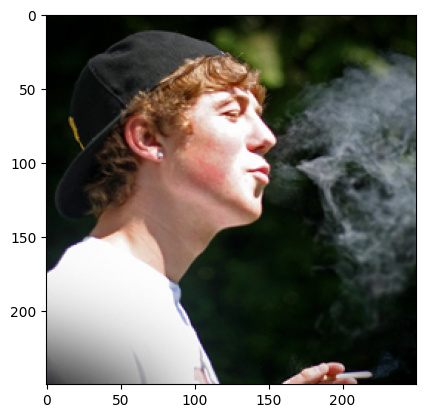

In [ ]:
plt.imshow(x_train[3])

In [ ]:
y_train[3]

'smoking'

# encode the labels using label encoder

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)


In [ ]:
y_train_encoded[0]

0

# data augmantaion

In [ ]:
def display_seq_images(images, labels, num_images=5):
    num_total_images = len(images)

    fig, axes = plt.subplots(1, num_images, figsize=(30, 5))
    for i, idx in enumerate(range(num_images)):
        axes[i].imshow(images[idx], aspect='auto')

        axes[i].set_title(labels[idx])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:

def augment_images(images, labels, num_augmentations=4):
    augmented_images = []
    augmented_labels = []

    # Define augmentation sequence
    seq = iaa.Sequential([
        iaa.Fliplr(1.0),  # Horizontal flip with 100% probability
        iaa.Multiply((1.5, 2.5), per_channel=0.5)  # Adjust saturation
    ])

    # Apply augmentation to each image
    for original_image, label in zip(images, labels):
        augmented_images.append(original_image)  # Add original image
        augmented_labels.append(label)

        # Apply augmentation to create additional augmented images
        augmented_images.extend(seq(images=[original_image] * (num_augmentations)))
        augmented_labels.extend([label] * (num_augmentations))

    return np.array(augmented_images), np.array(augmented_labels)

num_augmentations = 4

# Apply augmentation to the entire training dataset
augmented_images,augmented_labels = augment_images(x_train,y_train_encoded ,num_augmentations)

In [ ]:
y_train_encoded[0]

0

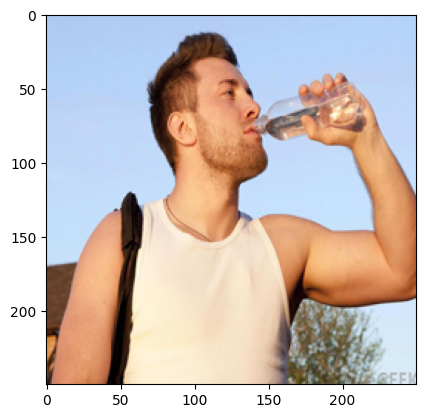

In [ ]:
plt.imshow(augmented_images[0])

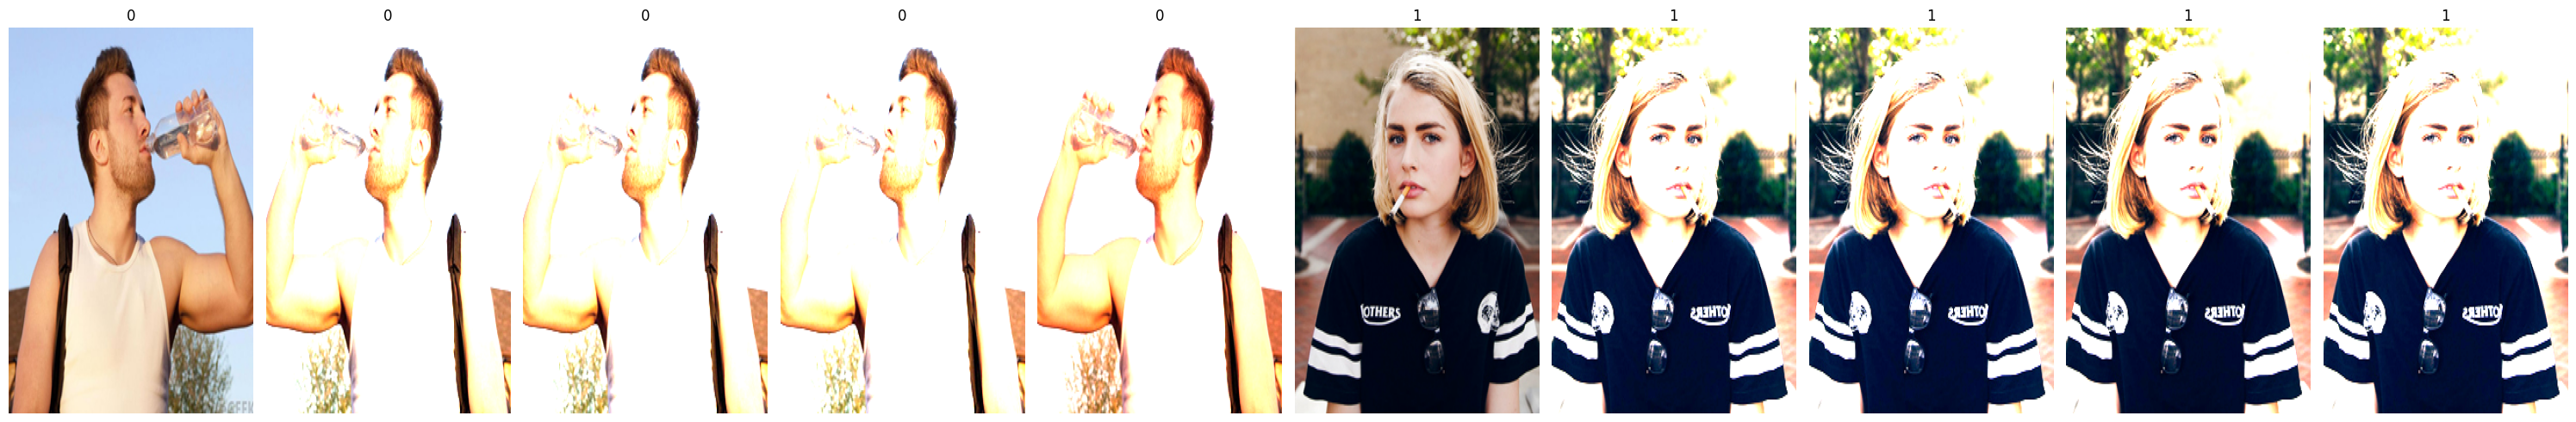

In [ ]:
display_seq_images(augmented_images,augmented_labels,10)

In [ ]:
augmented_images.shape

(3580, 250, 250, 3)

In [ ]:
augmented_labels.shape

(3580,)

# rescale images

In [ ]:
augmented_images[0].shape

(250, 250, 3)

In [ ]:
preprocess_input = keras.applications.mobilenet_v3.preprocess_input


# MobileNetV3Large model without fine tuning

In [ ]:
img_shape = augmented_images[0].shape
base_model = keras.applications.MobileNetV3Large(
    input_shape=img_shape,
    include_top=False,
    weights="imagenet",

)

/usr/local/lib/python3.10/dist-packages/keras/src/applications/mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False
base_model.summary()

Model: "MobileNetV3Large"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 250, 250, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 250, 250, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 125, 125, 16)   │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 125, 125, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 125, 125, 16)   │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 125, 125, 16)   │            144 │ activation[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 125, 125, 16)   │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 125, 125, 16)   │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 125, 125, 16)   │            256 │ re_lu[0][0]            │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_bn  │ (None, 125, 125, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_add (Add)   │ (None, 125, 125, 16)   │              0 │ activation[0][0],      │
│                           │                        │                │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand    │ (None, 125, 125, 64)   │          1,024 │ expanded_conv_add[0][… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand_bn │ (None, 125, 125, 64)   │            256 │ expanded_conv_1_expan… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 125, 125, 64)   │              0 │ expanded_conv_1_expan… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_depthwis… │ (None, 127, 127, 64)   │              0 │ re_lu_1[0][0]          │
│ (ZeroPadding2D)           │                        │                │                        │
├──────────────────────

 Total params: 2,996,352 (11.43 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,996,352 (11.43 MB)

In [ ]:
# Build the model on top of the pre-trained base
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # Use 'softmax' activation for multi-class classification
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              metrics=['accuracy'])

# You should not need to explicitly call model.build if the input shape is already defined.
# The first layer of your model (base_model) has a defined input shape

In [ ]:
augmented_labels[0].dtype

dtype('int64')

In [ ]:
epochs=30

In [ ]:
batch_size = 32

# Train the model with batches
history = model.fit(augmented_images, augmented_labels, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test_encoded))

Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.5110 - loss: 1.1991 - val_accuracy: 0.5938 - val_loss: 0.7138
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.5615 - loss: 0.9803 - val_accuracy: 0.7098 - val_loss: 0.5681
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.6373 - loss: 0.8034 - val_accuracy: 0.7634 - val_loss: 0.4665
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.6375 - loss: 0.7657 - val_accuracy: 0.8125 - val_loss: 0.3984
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.7005 - loss: 0.6809 - val_accuracy: 0.8438 - val_loss: 0.3597
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.7045 - loss: 0.6114 - val_accuracy: 0.8750 - val_loss: 0.3258
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.7411 - loss: 0.5701 - val_accuracy: 0.8839 - val_loss: 0.3055
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7372 - loss: 0.5746 - val_accu

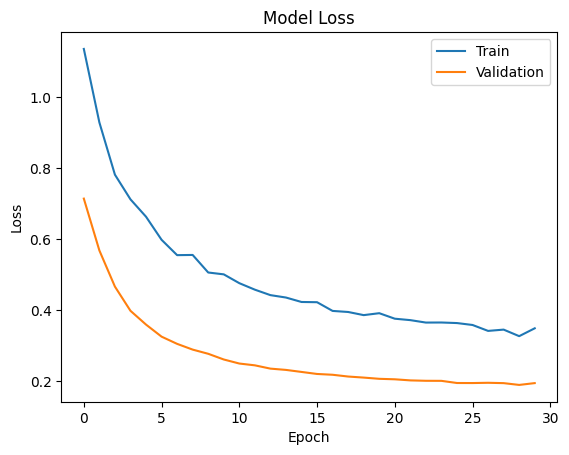

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# MobileNetV3Large with fine tuning

In [ ]:
base_model.trainable = True

In [ ]:
fine_tune_layers = 100

for layer in base_model.layers[:fine_tune_layers]:
    layer.trainable = False

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.00001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
fine_tune_epochs = 25
total_epochs = epochs + fine_tune_epochs
batch_size = 32

# Train the model with batches
history_tuned = model.fit(augmented_images, augmented_labels, epochs=total_epochs,initial_epoch = history.epoch[-1], batch_size=batch_size, validation_data=(x_test, y_test_encoded))


Epoch 30/55
 84/112 ━━━━━━━━━━━━━━━━━━━━ 1:19 3s/step - accuracy: 0.7663 - loss: 0.5070

KeyboardInterrupt: 

In [ ]:
combined_loss = history.history['loss'] +  history_tuned.history['loss']
combined_val_loss = history.history['val_loss'] +  history_tuned.history['val_loss']

# Plot the combined loss values
plt.plot(combined_loss)
plt.plot(combined_val_loss)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')


# Add a vertical line to visually separate the two training sessions
plt.axvline(x=len(history.history['loss']), color='k', linestyle='--')
plt.legend(['Train', 'Validation','fine tuning'], loc='upper right')
plt.show()

# model predictions

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0]

In [ ]:
class_name = {1: 'smoking', 0: 'notsmoking'}
def plot_image(i,pred_array,true_label,img):
  pred_array , true_label , img= pred_array[i] , true_label[i] , img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label = np.argmax(pred_array)


  if(predicted_label == true_label):
      color='blue'
  else:
     color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                        100*np.max(pred_array),
                                        class_name[true_label])).set_color(color)
  plt.title("Image {}".format(i + 1))


def plot_activation_value(i,pred_array,true_label):
  pred_array , true_label = pred_array[i] , true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(2),pred_array,color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(pred_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  top_classes = np.argsort(pred_array)[-3:][::-1]


In [ ]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i , predictions , y_test_encoded , x_test)
plt.subplot(1,2,2)
plot_activation_value(i,predictions,y_test_encoded)
plt.show()

In [ ]:
i=70
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i , predictions , y_test_encoded , x_test)
plt.subplot(1,2,2)
plot_activation_value(i,predictions,y_test_encoded)
plt.show()